In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lambdas & Apply

## 1. Transformar daos con lambda
- Datos: {'precio': [100, 200, 300, 400, 500],
        'producto': ['Manzana','Pera','Platano','Sandia','Piña']}

- Usa una función lambda para calular un 10% de descuento en cada precio y añadirlo como una nueva columna llamada descuento.

- Crea otra columna llamda precio_final, que reste el descuento del precio original.


In [13]:
# Datos iniciales
data = {
    'precio': [100, 200, 300, 400, 500],
    'producto': ['Manzana', 'Pera', 'Platano', 'Sandia', 'Piña']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Calcular el 10% de descuento y añadir la columna "descuento"
df['descuento'] = df['precio'].apply(lambda x: x * 0.10)

# Calcular el precio final y añadir la columna "precio_final"
df['precio_final'] = df['precio'] - df['descuento']

# Mostrar el DataFrame actualizado
df


,precio,producto,descuento,precio_final
0,100,Manzana,10.0,90.0
1,200,Pera,20.0,180.0
2,300,Platano,30.0,270.0
3,400,Sandia,40.0,360.0
4,500,Piña,50.0,450.0


## 2. Clasificar valores usando una función def que le pasamos al .apply
- Datos: {'edad': [5, 17, 18, 33, 70],
        'nombre': ['Adrian','Marta','Ana','Pedro','Pablo']}
- Define una función personalizada que clasifique a las personas en:      
  - "Niño" si la edad es menor a 12
  - "Adolescentes" si está entre 12 y 17
  - "Adulto" si está entre 18 y 64
  - "Mayor" si tiene 65 o más

- Usa apply para aplicar esta función a la columna edad y crear una nueva columna llamada clasificación.   



In [14]:
# Clasificar valores según la edad
data_edades = {
    'edad': [5, 17, 18, 33, 70],
    'nombre': ['Adrian', 'Marta', 'Ana', 'Pedro', 'Pablo']
}

# Crear el DataFrame de edades
df_edades = pd.DataFrame(data_edades)

def clasificar_edad(edad):
    match edad:
        case _ if edad < 12:
            return "Niño"
        case _ if 12 <= edad <= 17:
            return "Adolescente"
        case _ if 18 <= edad <= 64:
            return "Adulto"
        case _:
            return "Mayor"

# Aplicar la función de clasificación
df_edades['clasificación'] = df_edades['edad'].apply(clasificar_edad)

df_edades

,edad,nombre,clasificación
0,5,Adrian,Niño
1,17,Marta,Adolescente
2,18,Ana,Adulto
3,33,Pedro,Adulto
4,70,Pablo,Mayor


## 3. Operaciones en filas 
- Datos: {
    'producto': ['A', 'B', 'C'],
    'precio': [50, 100, 200],
    'cantidad': [1, 3, 2]
}
- Calcula el costo total de cada producto (precio * cantidad) usando apply con axis=1 y guarda el resultado en una nueva columna llamada costo_total.

In [15]:
# calcular costo total
data_productos = {
    'producto': ['A', 'B', 'C'],
    'precio': [50, 100, 200],
    'cantidad': [1, 3, 2]
}

# Crear el DataFrame de productos
df_productos = pd.DataFrame(data_productos)

def calcular_costo_total(fila):
    return fila['precio'] * fila['cantidad']

# Calcular el costo total y añadir la columna "costo_total"
df_productos['costo_total'] = df_productos.apply(calcular_costo_total, axis=1)

df_productos

,producto,precio,cantidad,costo_total
0,A,50,1,50
1,B,100,3,300
2,C,200,2,400


---


# Índices

## 4. Restablecer indices

- Data:  {
    'producto': ['A', 'B', 'C', 'D', 'E'],
    'ventas': [100, 200, 150, 300, 250]
}

- Filtrar los productos con ventas superiores a 150 y almacenarlo en un nuevo DataFrame
- Restablece el indice de este nuevo DataFrame y:
  - Guarda el indice original como una nueva columna llamada indice_original.
  - Genera un nuevo indice consecutivo.
Ordena el DataFrame por la columna ventas en orden descendente y reestablece el indice nuevamente (esta vez eliminando el índice anterior)

In [19]:

data = {
    'producto': ['A', 'B', 'C', 'D', 'E'],
    'ventas': [100, 200, 150, 300, 250]
}

# Crear el DataFrame
# Convertimos el diccionario en un DataFrame de pandas para realizar las operaciones necesarias.
df = pd.DataFrame(data)

# Filtrar productos con ventas superiores a 150
# Seleccionamos únicamente las filas donde las ventas sean mayores a 150.
filtered_df = df[df['ventas'] > 150].copy()

# Restablecer el índice y guardar el índice original
# Reiniciamos el índice del DataFrame filtrado para que comience desde cero.
# El índice original se guarda como una nueva columna llamada "indice_original".
filtered_df.reset_index(inplace=True)
filtered_df.rename(columns={'index': 'indice_original'}, inplace=True)

# Ordenar por ventas en orden descendente
# Ordenamos el DataFrame por la columna "ventas" de mayor a menor.
filtered_df.sort_values(by='ventas', ascending=False, inplace=True)

# Restablecer el índice nuevamente y eliminar el índice anterior
# Después de ordenar, reiniciamos el índice nuevamente, eliminando el índice previo.
filtered_df.reset_index(drop=True, inplace=True)

# Mostrar el DataFrame final
# Imprimimos el DataFrame procesado, que incluye:
# - Productos con ventas superiores a 150
# - Índice original antes del filtrado
# - Ordenados por ventas en orden descendente con un nuevo índice consecutivo.
print(filtered_df)

   indice_original producto  ventas
0                3        D     300
1                4        E     250
2                1        B     200


#  Datos aleatorios y Seaborn 

5. DataFrame aleatorio y Gráfica
- Genera un nuevo dataframe usando random.randint de la libreria numpy el cual contenga dos columnas "Edad_Usuario" y "Streams" (tendrás que usar dos veces el metodo randit, uno para rellenar cada columna).
- Crea un gráfico de dispersión con Seaborn (scatterplot) con Edad_Usuario en el eje X y Streams en el eje Y.
- Déjalo bonito si puedes.

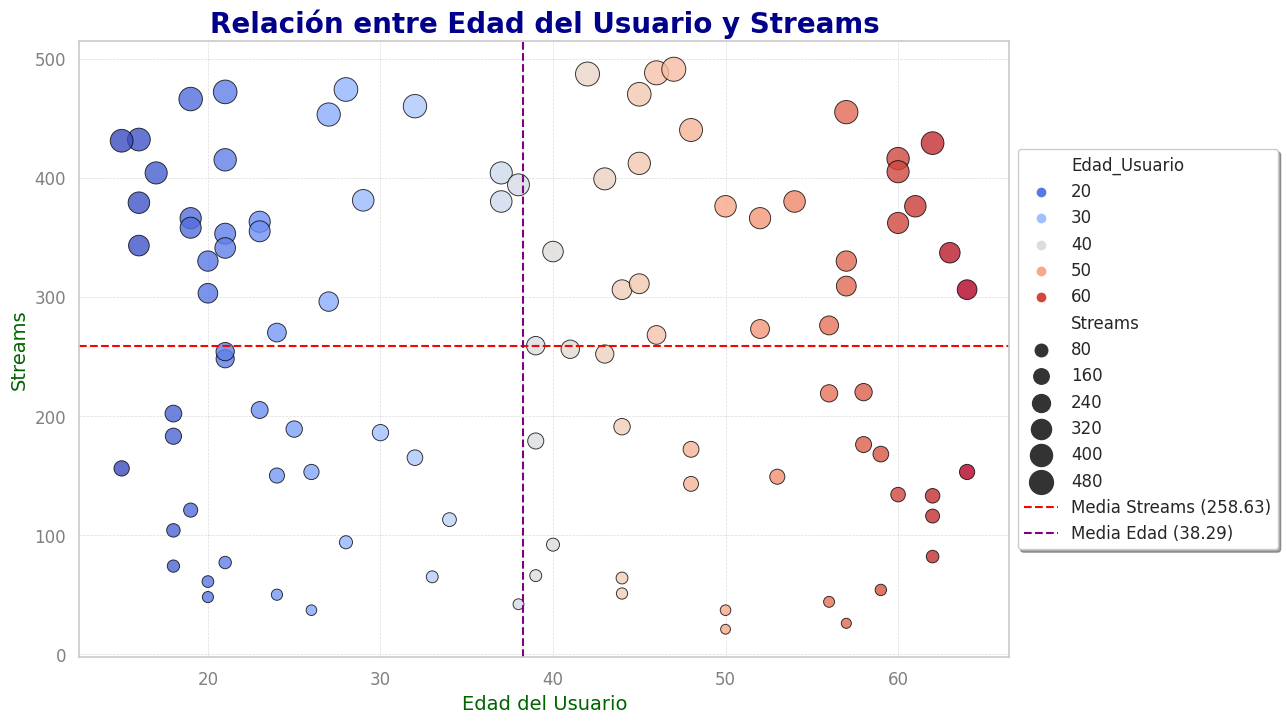

In [27]:
# Generar un DataFrame aleatorio
# Usamos np.random.randint para crear valores aleatorios en dos columnas: Edad_Usuario y Streams.
data = {
    'Edad_Usuario': np.random.randint(15, 65, 100),  # Edades entre 15 y 65
    'Streams': np.random.randint(10, 500, 100)       # Streams entre 10 y 500
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
sns.set_theme(style="whitegrid")  # Configurar un tema más estético

# Usar Seaborn para un gráfico con detalles adicionales
sns.scatterplot(
    data=df, 
    x='Edad_Usuario', 
    y='Streams', 
    hue='Edad_Usuario',  # Añadimos color basado en Edad_Usuario
    size='Streams',  # Tamaño de puntos basado en Streams
    palette="coolwarm", 
    sizes=(50, 300),  # Ajustar el rango de tamaños de los puntos
    alpha=0.8, 
    edgecolor='black'
)

# Añadir detalles al gráfico
plt.title('Relación entre Edad del Usuario y Streams', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Edad del Usuario', fontsize=14, color='darkgreen')
plt.ylabel('Streams', fontsize=14, color='darkgreen')

# Añadir anotaciones estadísticas
plt.axhline(df['Streams'].mean(), color='red', linestyle='--', label=f'Media Streams ({df["Streams"].mean():.2f})')
plt.axvline(df['Edad_Usuario'].mean(), color='purple', linestyle='--', label=f'Media Edad ({df["Edad_Usuario"].mean():.2f})')

# Personalización decorativa adicional
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Líneas de cuadrícula personalizadas
plt.xticks(fontsize=12, color='gray')  # Personalización de etiquetas del eje X
plt.yticks(fontsize=12, color='gray')  # Personalización de etiquetas del eje Y
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, shadow=True, title_fontsize=12)  # Mover la leyenda fuera del gráfico
# Mostrar el gráfico
plt.show()